In [1]:
# importing basic library:
import numpy as np
import pandas as pd 

# for visualizattion:
import matplotlib.pyplot as plt
import seaborn as sns

# for ignoring warnings:
import warnings
warnings.filterwarnings("ignore")

# for splitting data and Cross-validation:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# for preprocessing:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# for predictive modeling
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from xgboost import XGBClassifier

# for auc:
from sklearn import metrics

# for evaluation matrix:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# for dumping model
import pickle

In [2]:
diabeties= pd.read_csv(r"Pima Indians Diabeties.csv", header=0)

In [3]:
print(diabeties.shape)
diabeties.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabeties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabeties.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabeties.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Visualization

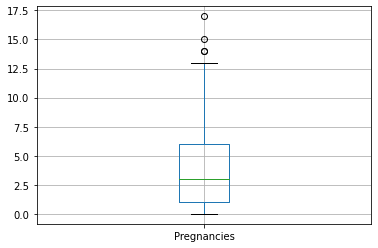

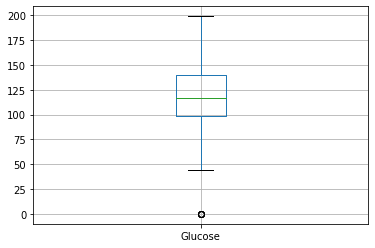

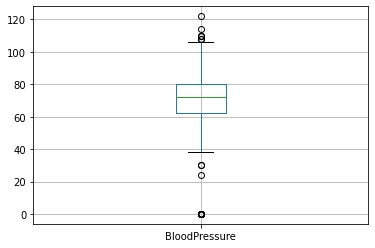

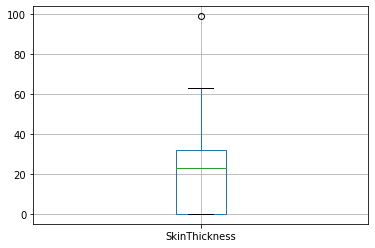

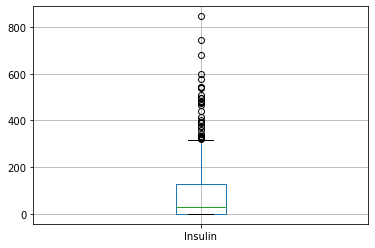

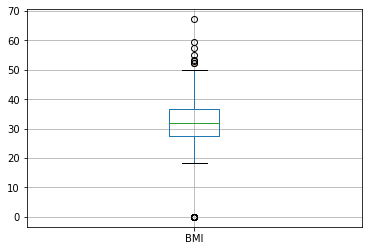

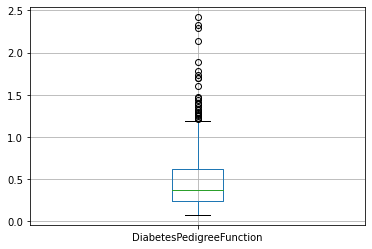

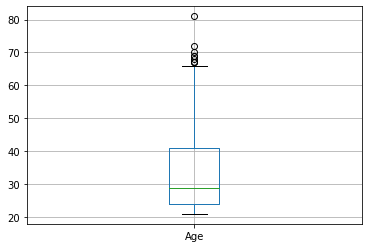

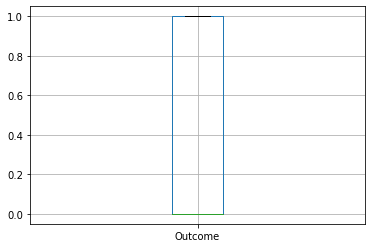

In [7]:
for i in diabeties.columns:
    diabeties.boxplot(column=i)
    plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

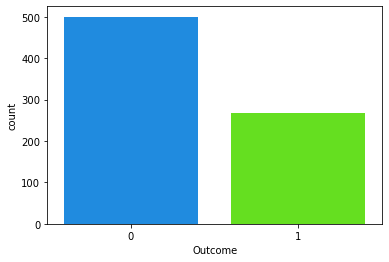

In [8]:
sns.countplot(x='Outcome', data=diabeties, palette="gist_rainbow_r")

In [9]:
diabeties["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Outliers treatment

(764, 9)
(4, 9)
-6.5
3
(768, 9)


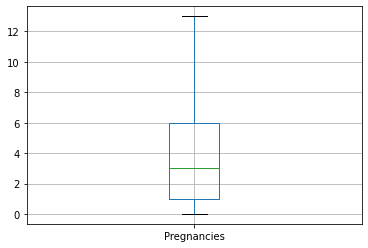

In [10]:
#for value in colname:
q1 = diabeties['Pregnancies'].quantile(0.25) #first quartile value
q3 = diabeties['Pregnancies'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

diabeties_include = diabeties.loc[(diabeties['Pregnancies'] >= low) & \
                                (diabeties['Pregnancies'] <= high)] # meeting the acceptable range
diabeties_exclude = diabeties.loc[(diabeties['Pregnancies'] < low) | (diabeties['Pregnancies'] > high)] #not meeting the acceptable range

print(diabeties_include.shape)
print(diabeties_exclude.shape)

print(low)

Pregnancies_mean=int(diabeties_include.Pregnancies.mean()) #finding the mean of the acceptable range
print(Pregnancies_mean)

#imputing outlier values with mean value
diabeties_exclude.Pregnancies=Pregnancies_mean

#getting back the original shape of df
diabeties_rev1=pd.concat([diabeties_include,diabeties_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(diabeties_rev1.shape)

diabeties_rev1.boxplot(column="Pregnancies")
plt.show()

(723, 9)
(45, 9)
35.0
72
(768, 9)


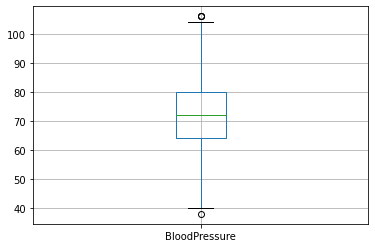

In [11]:
#for value in colname:
q1 = diabeties_rev1['BloodPressure'].quantile(0.25) #first quartile value
q3 = diabeties_rev1['BloodPressure'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

diabeties_rev1_include = diabeties_rev1.loc[(diabeties_rev1['BloodPressure'] >= low) & \
                                (diabeties_rev1['BloodPressure'] <= high)] # meeting the acceptable range
diabeties_rev1_exclude = diabeties_rev1.loc[(diabeties_rev1['BloodPressure'] < low) | (diabeties_rev1['BloodPressure'] > high)] #not meeting the acceptable range

print(diabeties_rev1_include.shape)
print(diabeties_rev1_exclude.shape)

print(low)

BloodPressure_mean=int(diabeties_rev1_include.BloodPressure.mean()) #finding the mean of the acceptable range
print(BloodPressure_mean)

#imputing outlier values with mean value
diabeties_rev1_exclude.BloodPressure=BloodPressure_mean

#getting back the original shape of df
diabeties_rev2=pd.concat([diabeties_rev1_include,diabeties_rev1_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(diabeties_rev2.shape)

diabeties_rev2.boxplot(column=["BloodPressure"])
plt.show()

(734, 9)
(34, 9)
-190.875
62
(768, 9)


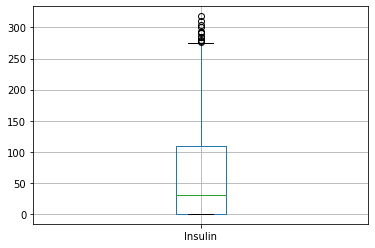

In [12]:
#for value in colname:
q1 = diabeties_rev2['Insulin'].quantile(0.25) #first quartile value
q3 = diabeties_rev2['Insulin'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

diabeties_rev2_include = diabeties_rev2.loc[(diabeties_rev2['Insulin'] >= low) & \
                                (diabeties_rev2['Insulin'] <= high)] # meeting the acceptable range
diabeties_rev2_exclude = diabeties_rev2.loc[(diabeties_rev2['Insulin'] < low) | (diabeties_rev2['Insulin'] > high)] #not meeting the acceptable range

print(diabeties_rev2_include.shape)
print(diabeties_rev2_exclude.shape)

print(low)

Insulin_mean=int(diabeties_rev2_include.Insulin.mean()) #finding the mean of the acceptable range
print(Insulin_mean)

#imputing outlier values with mean value
diabeties_rev2_exclude.Insulin=Insulin_mean

#getting back the original shape of df
diabeties_rev3=pd.concat([diabeties_rev2_include,diabeties_rev2_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(diabeties_rev3.shape)

diabeties_rev3.boxplot(column=["Insulin"])
plt.show()

## Upsampling target variable

In [13]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = diabeties_rev3[diabeties_rev3["Outcome"]==0]
df_minority = diabeties_rev3[diabeties_rev3["Outcome"]==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=500, random_state=10)

# Combine majority class with upsampled minority class
diabeties_rev = pd.concat([df_majority, df_minority_upsampled])

0    500
1    500
Name: Outcome, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

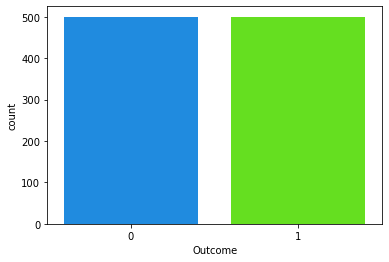

In [14]:
print(diabeties_rev["Outcome"].value_counts())
sns.countplot(x='Outcome', data=diabeties_rev, palette="gist_rainbow_r")

In [15]:
X= diabeties_rev.iloc[:,:-1]
Y= diabeties_rev["Outcome"]
print(X.shape, Y.shape)

(1000, 8) (1000,)


# Splitting Data

In [16]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(700, 8) (700,) (300, 8) (300,)


In [17]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Machine Learning Models

## Logistic Regression

In [18]:
model_log= LogisticRegression()
model_log.fit(X_train, Y_train)
LR=model_log.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, LR),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, LR),"\n")
print("Classification report\n", classification_report(Y_test, LR),"\n")

Accuracy score:
 0.7733333333333333 

Confusion matix:
 [[114  33]
 [ 35 118]] 

Classification report
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       147
           1       0.78      0.77      0.78       153

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300
 



## Stochastic Gradient Descent

In [19]:
model_sgd= SGDClassifier(loss="log", random_state=10, alpha=0.01, max_iter=1000, shuffle=True, early_stopping=True, 
                        n_iter_no_change=3)
model_sgd.fit(X_train, Y_train)
SGD= model_sgd.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SGD),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SGD),"\n")
print("Classification report\n", classification_report(Y_test, SGD),"\n")

Accuracy score:
 0.7866666666666666 

Confusion matix:
 [[120  27]
 [ 37 116]] 

Classification report
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       147
           1       0.81      0.76      0.78       153

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300
 



## K-Nearest Neighbors

In [20]:
model_KNN= KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric="euclidean")
model_KNN.fit(X_train, Y_train)
KNN= model_KNN.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, KNN),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, KNN),"\n")
print("Classification report\n", classification_report(Y_test, KNN),"\n")

Accuracy score:
 0.7733333333333333 

Confusion matix:
 [[119  28]
 [ 40 113]] 

Classification report
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       147
           1       0.80      0.74      0.77       153

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300
 



In [21]:
int(np.sqrt(len(X_train)))

26

In [22]:
model_KNN= KNeighborsClassifier(n_neighbors=55, metric="euclidean")
model_KNN.fit(X_train, Y_train)
KNN= model_KNN.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, KNN),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, KNN),"\n")
print("Classification report\n", classification_report(Y_test, KNN),"\n")

Accuracy score:
 0.7566666666666667 

Confusion matix:
 [[112  35]
 [ 38 115]] 

Classification report
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       147
           1       0.77      0.75      0.76       153

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300
 



## Support Vector Machine

In [23]:
model_svm= SVC(kernel='rbf', C=1, gamma=0.01)
model_svm.fit(X_train, Y_train)
SVM= model_svm.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SVM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SVM),"\n")
print("Classification report\n", classification_report(Y_test, SVM),"\n")

Accuracy score:
 0.7866666666666666 

Confusion matix:
 [[116  31]
 [ 33 120]] 

Classification report
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       147
           1       0.79      0.78      0.79       153

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300
 



In [24]:
model_svm_tune= SVC(kernel='rbf', C=300, gamma=0.01)
model_svm_tune.fit(X_train, Y_train)
SVM_tune= model_svm_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SVM_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SVM_tune),"\n")
print("Classification report\n", classification_report(Y_test, SVM_tune),"\n")

Accuracy score:
 0.7933333333333333 

Confusion matix:
 [[115  32]
 [ 30 123]] 

Classification report
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       147
           1       0.79      0.80      0.80       153

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300
 



## Decision Tree

In [25]:
model_DT= DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
model_DT.fit(X_train, Y_train)
DT= model_DT.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, DT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, DT),"\n")
print("Classification report\n", classification_report(Y_test, DT),"\n")

Accuracy score:
 0.82 

Confusion matix:
 [[107  40]
 [ 14 139]] 

Classification report
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       147
           1       0.78      0.91      0.84       153

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300
 



## Extra tree

In [26]:
model_EXT= ExtraTreesClassifier(n_estimators=100, random_state=10)
model_EXT.fit(X_train,Y_train)
EXT= model_EXT.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, EXT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT),"\n")
print("Classification report\n", classification_report(Y_test, EXT),"\n")

Accuracy score:
 0.8733333333333333 

Confusion matix:
 [[128  19]
 [ 19 134]] 

Classification report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       147
           1       0.88      0.88      0.88       153

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300
 



In [27]:
model_EXT_tune= ExtraTreesClassifier(n_estimators=300, random_state=10)
model_EXT_tune.fit(X_train,Y_train)
EXT_tune= model_EXT_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, EXT_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT_tune),"\n")
print("Classification report\n", classification_report(Y_test, EXT_tune),"\n")

Accuracy score:
 0.88 

Confusion matix:
 [[130  17]
 [ 19 134]] 

Classification report
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       147
           1       0.89      0.88      0.88       153

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300
 



## Random Forest

In [28]:
model_RF= RandomForestClassifier(n_estimators=100, random_state=10)
model_RF.fit(X_train,Y_train)
RF= model_RF.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, RF),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, RF),"\n")
print("Classification report\n", classification_report(Y_test, RF),"\n")

Accuracy score:
 0.86 

Confusion matix:
 [[122  25]
 [ 17 136]] 

Classification report
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       147
           1       0.84      0.89      0.87       153

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300
 



## Tune Random Forest

In [29]:
model_RF_tune= RandomForestClassifier(n_estimators=130, random_state=10)
model_RF_tune.fit(X_train,Y_train)
RF_tune= model_RF_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, RF_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, RF_tune),"\n")
print("Classification report\n", classification_report(Y_test, RF_tune),"\n")

Accuracy score:
 0.8666666666666667 

Confusion matix:
 [[124  23]
 [ 17 136]] 

Classification report
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       147
           1       0.86      0.89      0.87       153

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300
 



## Ada Boost

In [30]:
model_AB= AdaBoostClassifier(n_estimators=100, random_state=10)
model_AB.fit(X_train,Y_train)
AB= model_AB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, AB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, AB),"\n")
print("Classification report\n", classification_report(Y_test, AB),"\n")

Accuracy score:
 0.8033333333333333 

Confusion matix:
 [[116  31]
 [ 28 125]] 

Classification report
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       147
           1       0.80      0.82      0.81       153

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300
 



## Gradient Boost

In [31]:
model_GB= GradientBoostingClassifier(n_estimators=100, random_state=10)
model_GB.fit(X_train,Y_train)
GB= model_GB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, GB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, GB),"\n")
print("Classification report\n", classification_report(Y_test, GB),"\n")

Accuracy score:
 0.8433333333333334 

Confusion matix:
 [[120  27]
 [ 20 133]] 

Classification report
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       147
           1       0.83      0.87      0.85       153

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300
 



## Tune Gradient Boost

In [32]:
model_GB_tune= GradientBoostingClassifier(n_estimators=420, random_state=10)
model_GB_tune.fit(X_train,Y_train)
GB_tune= model_GB_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, GB_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, GB_tune),"\n")
print("Classification report\n", classification_report(Y_test, GB_tune),"\n")

Accuracy score:
 0.8666666666666667 

Confusion matix:
 [[121  26]
 [ 14 139]] 

Classification report
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       147
           1       0.84      0.91      0.87       153

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300
 



## XGBoost

In [33]:
model_XGB= XGBClassifier(n_estimators=120,random_state=10)
model_XGB.fit(X_train,Y_train)
XGB=model_XGB.predict(X_test)
print()

print("Accuracy score:\n", accuracy_score(Y_test, XGB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, XGB),"\n")
print("Classification report\n", classification_report(Y_test, XGB),"\n")

[19:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy score:
 0.8533333333333334 

Confusion matix:
 [[120  27]
 [ 17 136]] 

Classification report
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       147
           1       0.83      0.89      0.86       153

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300
 



## Ensemble

In [34]:
estimators = []

# model1 = LogisticRegression()
# estimators.append(('LR', model1))

# model2 = SGDClassifier(loss="log", random_state=10, alpha=0.01, max_iter=1000, shuffle=True, early_stopping=True, n_iter_no_change=3)
# estimators.append(('SGD', model2))

# model3 = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric="euclidean")
# estimators.append(('KNN', model3))

# model4 = SVC(kernel='rbf', C=300, gamma=0.01)
# estimators.append(('SVM', model4))

# model5 = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
# estimators.append(('DT', model5))

model6 = ExtraTreesClassifier(n_estimators=100, random_state=10)
estimators.append(('EXT', model6))

model7 = RandomForestClassifier(n_estimators=130, random_state=10)
estimators.append(('RT', model7))

# model8 = AdaBoostClassifier(n_estimators=100, random_state=10)
# estimators.append(('AB', model8))

model9 = GradientBoostingClassifier(n_estimators=420, random_state=10)
estimators.append(('GB', model9))

model10 = XGBClassifier(n_estimators=120,random_state=10)
estimators.append(('XGB', model10))

# create the ensemble model
model_ensemble = VotingClassifier(estimators)
model_ensemble.fit(X_train,Y_train)
EM=model_ensemble.predict(X_test)

print()
print("Accuracy score:\n", accuracy_score(Y_test, EM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EM),"\n")
print("Classification report\n", classification_report(Y_test, EM),"\n")

[19:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy score:
 0.88 

Confusion matix:
 [[128  19]
 [ 17 136]] 

Classification report
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       147
           1       0.88      0.89      0.88       153

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300
 



In [35]:
pickle.dump(model_EXT_tune,open("model_EXT.pkl", "wb"))
pickle.dump(model_RF_tune,open("model_RF.pkl", "wb"))
pickle.dump(model_GB_tune,open("model_GB.pkl", "wb"))
pickle.dump(model_XGB,open("model_XGB.pkl", "wb"))
pickle.dump(model_ensemble,open("model_Ensemble.pkl", "wb"))